[View in Colaboratory](https://colab.research.google.com/github/UjjwalSaxena/road-glare-removal-tests/blob/master/tests1.ipynb)

In [0]:
# def upload_files():
#   from google.colab import files
#   uploaded = files.upload()
#   for k, v in uploaded.items():
#     open(k, 'wb').write(v)
#   return list(uploaded.keys())

# upload_files()


# !mkdir overExposed
# !mkdir underExposed

# !wget https://cdn-images-1.medium.com/max/1200/1*g5N5VKp-Jz3n41m-gmMdUg.jpeg
# !mv "1*g5N5VKp-Jz3n41m-gmMdUg.jpeg" "overExposed/overexpImage1.jpg"
# !wget https://image.freepik.com/fotos-gratis/conducao-atraves-de-uma-estrada-molhada_442-19322940.jpg
# !mv "conducao-atraves-de-uma-estrada-molhada_442-19322940.jpg" "overExposed/overexpImage2.jpg"
# !wget https://i0.wp.com/www.paintingwithwatercolors.com/wp-content/uploads/2014/02/Wet-day-in-Bathurst-with-Church.jpg
# !mv "Wet-day-in-Bathurst-with-Church.jpg" "overExposed/overexpImage3.jpg"

# !wget http://www.capecentralhigh.com/wp-content/uploads/2013/02/Southbound-Kingshighway-south-of-Broadway-02-18-2013_2317.jpg
# !mv "Southbound-Kingshighway-south-of-Broadway-02-18-2013_2317.jpg" "underExposed/underexpImage1.jpg"
# !wget http://postachio-images.s3-website-us-east-1.amazonaws.com/1ad8a66577cc75f228b2839036ab3d6b/98f7f2a8715b31c98cb3fb7f08eea44a/w600_77971a62ebfe9a28cf5439c3607b631f.jpg
# !mv "w600_77971a62ebfe9a28cf5439c3607b631f.jpg" "underExposed/underexpImage2.jpg"
# !wget http://www.capecentralhigh.com/wp-content/uploads/2013/02/Good-Hope-02-18-2013_2337.jpg
# !mv "Good-Hope-02-18-2013_2337.jpg" "underExposed/underexpImage3.jpg"

In [1]:
# !mv "overexpImage1.jpg" "overExposed/overexpImage1.jpg"
# !mv "overexpImage4.jpg" "overExposed/overexpImage4.jpg"
# cd overExposed

!ls -lrt

total 4
drwxr-xr-x 3 root root 4096 Jul 24 16:42 datalab


In [0]:
import matplotlib.pyplot as plt
# !pip install opencv-python
import cv2 
import glob

In [0]:
def loadImages(path):
  return plt.imread(path)
# plt.imshow(image)
# import glob
# imagePaths = [f for f in glob.glob('*.jpg')]
# imagePaths

In [0]:
def getLuminosity(image):
  return cv2.cvtColor(image, cv2.COLOR_RGB2YUV)[:,:,0]
# plt.imshow(image_YUV)

In [0]:
def getImagesFromFolder(foldername):
  imagePaths = [image_path for image_path in glob.glob(foldername+'/*.jpg')]
  images= [loadImages(image_path) for image_path in imagePaths]
  return images


In [0]:
def getMedianOfImage(single_d):
  single_d_sorted=sorted(single_d)
  median_luminance_value= single_d_sorted[len(single_d)//2]
  return median_luminance_value

def getMeanOfImage(single_d):
  mean_luminance_value= sum(single_d)/len(single_d)
  return mean_luminance_value

In [62]:

overExposedImages= getImagesFromFolder("overExposed")
underExposedImages= getImagesFromFolder("underExposed")

print(len(overExposedImages))
print(len(underExposedImages))

overExposedMedianValues=[]
overExposedmeanValues=[]
overExposedPixelValues=[]
overExposedImages_YUV=[]

underExposedMedianValues=[]
underExposedmeanValues=[]
underExposedPixelValues=[]
underExposedImages_YUV=[]

for image in overExposedImages:
  try:
    image_YUV= getLuminosity(image)
    overExposedImages_YUV.append(image_YUV)
    single_d= image_YUV.ravel()
    overExposedPixelValues.append(single_d)
    overExposedMedianValues.append(getMedianOfImage(single_d))
    overExposedmeanValues.append(getMeanOfImage(single_d))
  except:
    pass

for image in underExposedImages:
  try:
    image_YUV= getLuminosity(image)
    underExposedImages_YUV.append(image_YUV)
    single_d= image_YUV.ravel()
    underExposedPixelValues.append(single_d)
    underExposedMedianValues.append(getMedianOfImage(single_d))
    underExposedmeanValues.append(getMeanOfImage(single_d))
  except:
    pass

3
3


In [45]:
print('Over exposed Stats:')
print('====================')
print('')
print("%-20s %-10s %-20s"  % ("Median","|","Mean"))
for i in range(len(overExposedMedianValues)):
  print("%-20s %-10s %-20s"  % (overExposedMedianValues[i],"|",overExposedmeanValues[i]))

print('')
print('Under exposed Stats:')
print('====================')
print('')
print("%-20s %-10s %-20s"  % ("Median","|","Mean"))
for i in range(len(underExposedMedianValues)):
  print("%-20s %-10s %-20s"  % (underExposedMedianValues[i],"|",underExposedmeanValues[i]))


Over exposed Stats:

Median               |          Mean                
99                   |          128.58716221910652  
132                  |          131.46668143656717  
16                   |          47.60521979166667   

Under exposed Stats:

Median               |          Mean                
11                   |          22.46053452966607   
15                   |          27.17905017921147   
7                    |          21.676168170442573  


Skewness: is a measure of (lack of) symmetry. For instance, if the skewness is negative, the histogram is negatively skewed. That means its left tail is longer or fatter than its right one (wiki:skewness). Therefore, the frequency over the darker intensities (closer to zero) is wider spread (less concentrated, but not necessarily less frequent than the right tail!). The positive skewness is the opposite.

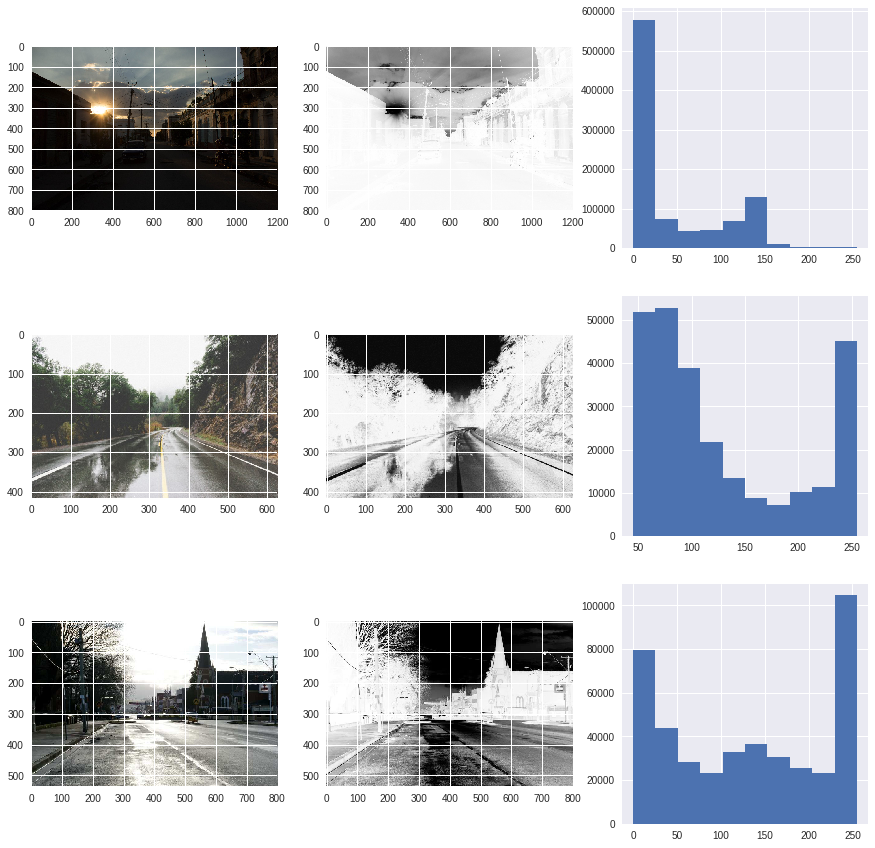

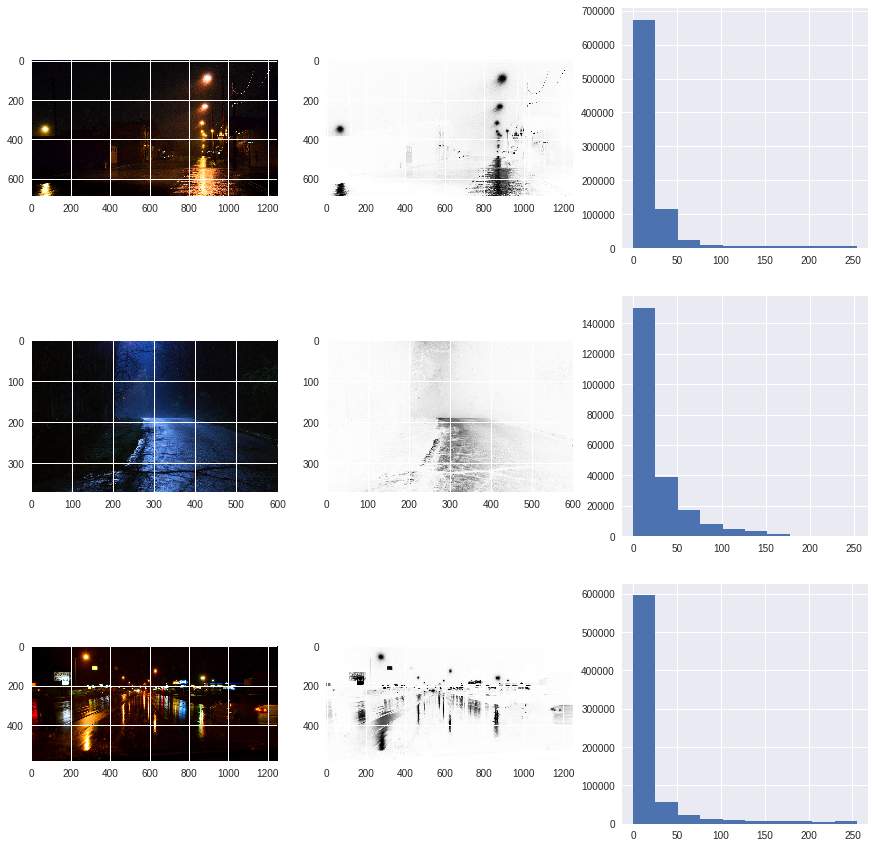

In [63]:
columns=3
fig, axs = plt.subplots(len(overExposedImages), columns, figsize=(15, 15))
for i in range(len(overExposedImages)):
  try:
    axs[i, 0].imshow(overExposedImages[i])
    axs[i, 1].imshow(overExposedImages_YUV[i])
    axs[i, 2].hist(overExposedPixelValues[i])
  except:
    pass
plt.show()

fig1, axs1 = plt.subplots(len(underExposedImages), columns, figsize=(15, 15))
for i in range(len(underExposedImages)):
  try:
    axs1[i, 0].imshow(underExposedImages[i])
    axs1[i, 1].imshow(underExposedImages_YUV[i])
    axs1[i, 2].hist(underExposedPixelValues[i])
  except:
    pass
plt.show()
#   fig.add_subplot(len(overExposedImages), columns, 2)
#   plt.imshow(overExposedImages[i])




Contrast changes

In [0]:
from PIL import Image

def change_contrast(image, level):
    factor = (259 * (level + 255)) / (255 * (259 - level))
    def contrast(c):
        return 128 + factor * (c - 128)
    return image.point(contrast)




In [0]:
import numpy as np
def contrast_variants(image_path):
  image_ar=[]
  result_set=[]
  img= Image.open(image_path)
  for i in range(-70, 70, 20):
    image= change_contrast(img, i)
    image_ar.append(image)

  fig2, axs2 = plt.subplots(len(image_ar),2, figsize=(15, 15))
  fig2.subplots_adjust(hspace=0.5)
  for i in range(len(image_ar)):
  #   try:

      res=[]
      np_image= np.copy(image_ar[i])
      res.append(np_image) #0
      height= np_image.shape[0]
      width= np_image.shape[1]
      np_image= np_image[:,:,:]
       
      axs2[i,0].imshow(np_image)
      
      YUV_image= getLuminosity(np_image)
      res.append(YUV_image) #1
      single_d= YUV_image.ravel()
      res.append(single_d) #2
  #     print(single_d)
      result = axs2[i,1].hist(single_d)
      mean=single_d.mean() 
      res.append(mean) #3
      median= sorted(single_d)[len(single_d)//2]
      res.append(median) #4
      axs2[i,1].axvline(mean, color='k', linestyle='dashed', linewidth=1)
      axs2[i,1].axvline(median, color='g', linestyle='dashed', linewidth=1)
      axs2[i,1].set_title("median: {0:.3f}, mean: {1:.3f}".format(median,mean))
      result_set.append(res)
      
  #   except:
  #     pass

  plt.show()
  return result_set


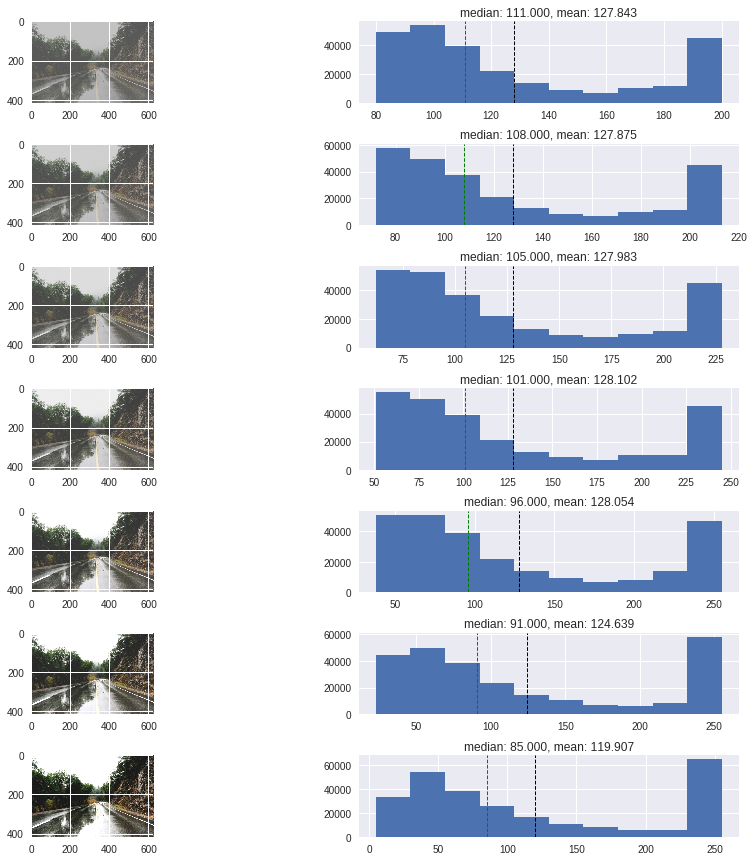

In [187]:
res_over= contrast_variants('overExposed/overexpImage2.jpg')

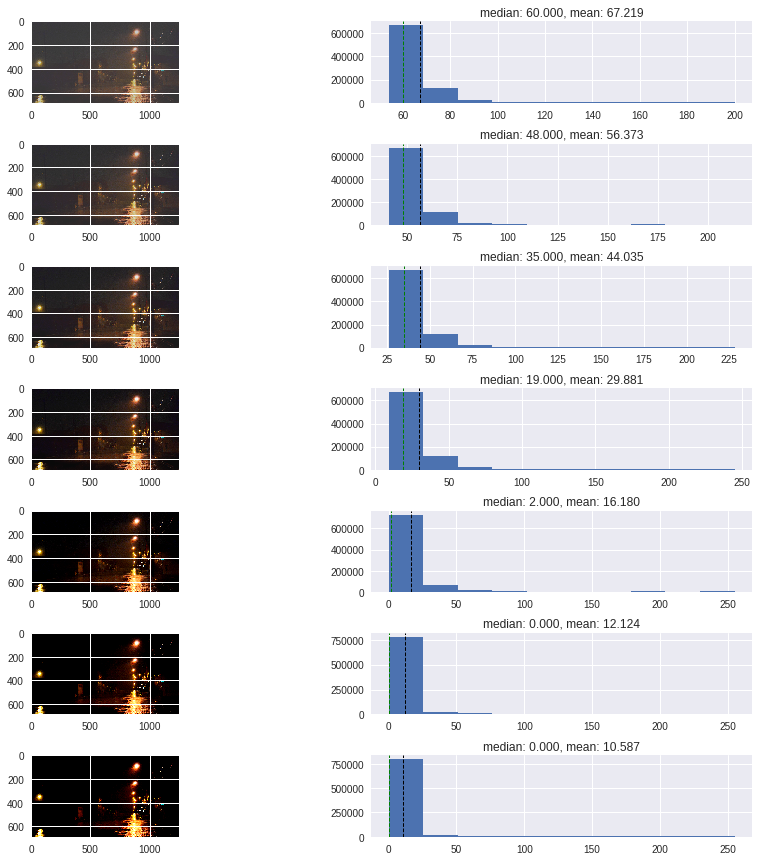

In [179]:
res_under=contrast_variants('underExposed/underexpImage3.jpg')

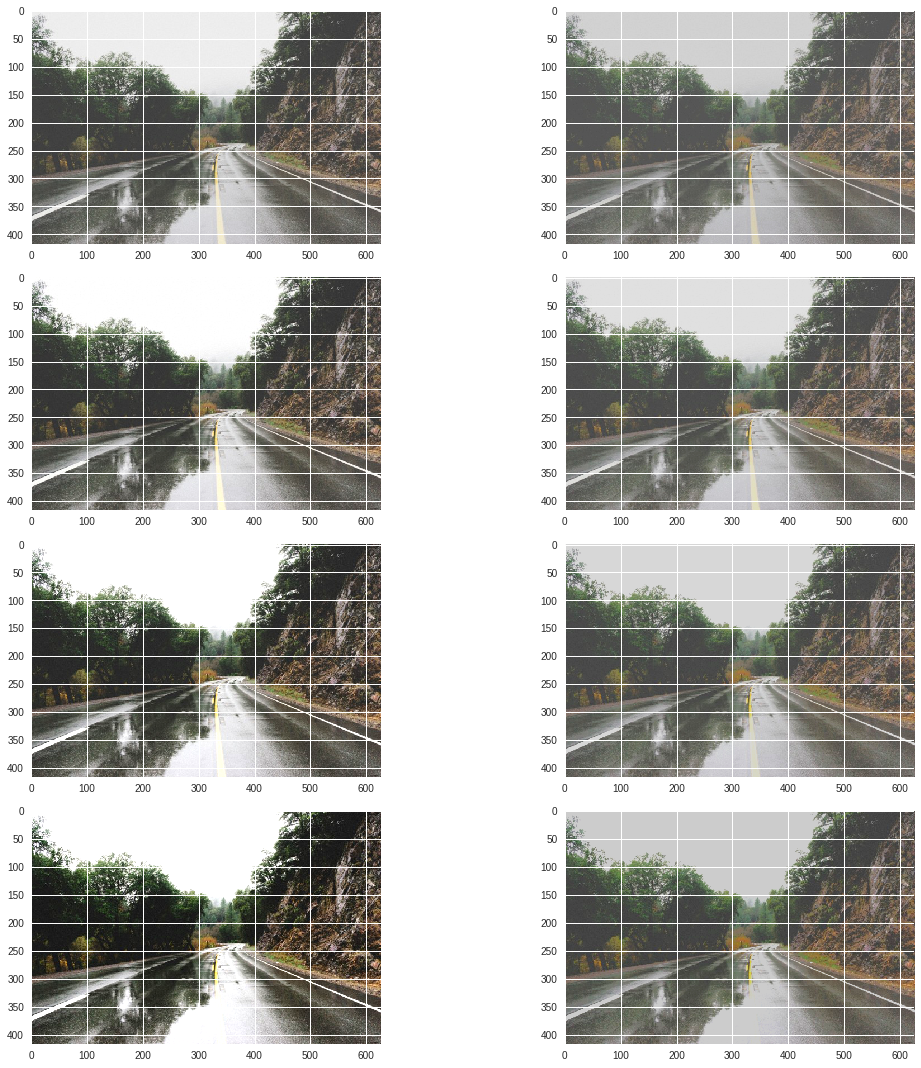

In [194]:
import math
fig3, axs3 = plt.subplots(len(res_over[3:7]),2, figsize=(15, 15))
fig3.tight_layout()
ind=0

for s in res_over[3:7]:
  image=s[0]
  YUV_image= s[1]
  median= s[3]

  height= YUV_image.shape[0]
  width= YUV_image.shape[1] 
  coeff=0
  for i in range(height):
    for j in range(width):
      pixel_value=YUV_image[i:i+1,j:j+1]
      if pixel_value>median:
        YUV_image[i:i+1,j:j+1]= min(pixel_value-int(math.sqrt(pixel_value-median)+coeff),255)
      else:
        YUV_image[i:i+1,j:j+1]= max(pixel_value+int(math.sqrt(median-pixel_value)+coeff),0)
  axs3[ind,0].imshow(image)      
  image= cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
  image[:,:,0]=YUV_image
  image= cv2.cvtColor(image, cv2.COLOR_YUV2RGB)
  axs3[ind,1].imshow(image)
  ind+=1
plt.show()
  